We first import the libraries we are going to use in this assignment, pandas for data analysis, numpy for maths, and matplotlib.pyplot for plotting.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We then read in the data file `planets_2024.csv' using pandas.read_csv(), and print the head of the table to see categories etc.

In [7]:
data_file = pd.read_csv('/home/dj-lawton/Documents/Junior Sophister/Computer Simulation/Python/Lab1/planets_2024.csv', skiprows=16)

data_file.head()

,pl_name,hostname,disc_year,disc_facility,pl_orbsmax,pl_bmassj,st_mass,sy_dist
0,11 Com b,11 Com,2007,Xinglong Station,1.178,15.464,2.09,93.1846
1,11 UMi b,11 UMi,2009,Thueringer Landessternwarte Tautenburg,1.530,14.740,2.78,125.3210
2,14 And b,14 And,2008,Okayama Astrophysical Observatory,0.775,3.559,1.78,75.4392
3,14 Her b,14 Her,2002,W. M. Keck Observatory,2.774,8.053,0.91,17.9323
4,16 Cyg B b,16 Cyg B,1996,Multiple Observatories,1.660,1.780,1.08,21.1397


0       2007
1       2009
2       2008
3       2002
4       1996
        ... 
5761    1996
5762    1999
5763    1999
5764    2021
5765    2007
Name: disc_year, Length: 5766, dtype: int64
[1992 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]


Text(0, 0.5, 'Number of Planets Discovered')

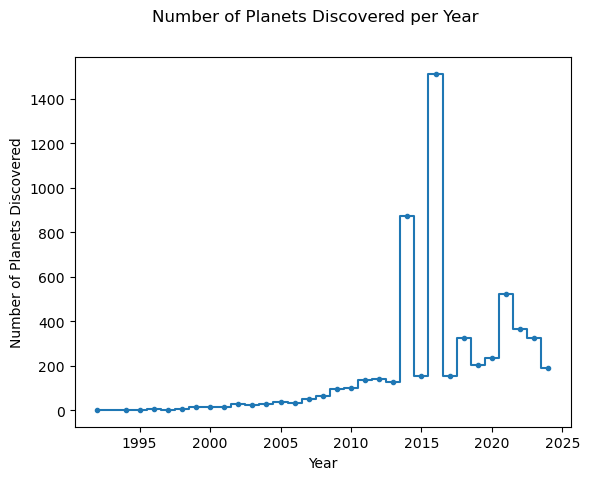

In [24]:
planet_disc_years = data_file['disc_year']
print(planet_disc_years)
unique_disc_years = np.unique(planet_disc_years)
print(unique_disc_years)
planets_per_year = []
for year in unique_disc_years:
    planets_per_year.append(len(planet_disc_years[planet_disc_years == year]))

fig, ax = plt.subplots()
fig.suptitle('Number of Planets Discovered per Year')
ax.plot(unique_disc_years, planets_per_year, marker='o', markersize=3, drawstyle='steps-mid')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Planets Discovered')